In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('student_info.csv')
df.head()

,study_hours,student_marks
0,6.83,78.50
1,6.56,76.74
2,NaN,78.68
3,5.67,71.82
4,8.67,84.19


In [3]:
df.shape

(200, 2)

# Discover and Visualize the data to gain insights

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   study_hours    195 non-null    float64
 1   student_marks  200 non-null    float64
dtypes: float64(2)
memory usage: 3.2 KB


In [5]:
df.describe()

,study_hours,student_marks
count,195.000000,200.00000
mean,6.995949,77.93375
std,1.253060,4.92570
min,5.010000,68.57000
25%,5.775000,73.38500
50%,7.120000,77.71000
75%,8.085000,82.32000
max,8.990000,86.99000


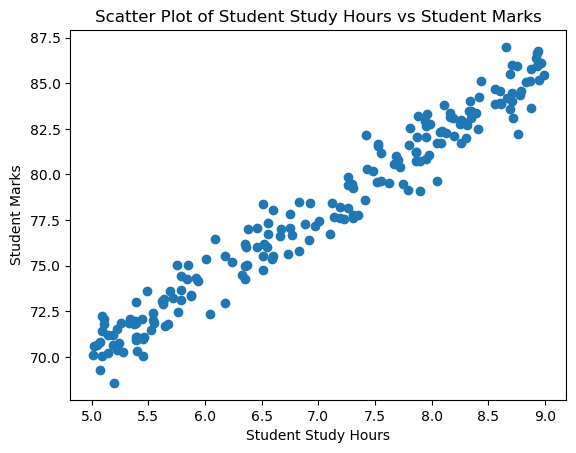

In [11]:
plt.scatter(x=df['study_hours'],y=df['student_marks'])
plt.xlabel("Student Study Hours")
plt.ylabel("Student Marks")
plt.title("Scatter Plot of Student Study Hours vs Student Marks")
plt.show()

# Prepare the data for Machine Learning Algorithms

# Data Cleaning:-

In [12]:
df.isnull().sum()

study_hours      5
student_marks    0
dtype: int64

In [13]:
df.mean()

study_hours       6.995949
student_marks    77.933750
dtype: float64

In [14]:
df.fillna(df.mean(),inplace=True)

In [15]:
df.isnull().sum()

study_hours      0
student_marks    0
dtype: int64

# Split DataSet

In [23]:
X=df.drop('student_marks',axis='columns')
y=df.drop('study_hours',axis='columns')

In [24]:
X.shape

(200, 1)

# Apply Train Test Split

In [25]:
from sklearn.model_selection import train_test_split

In [26]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=51)

In [27]:
print("shape of X_train = ",X_train.shape)
print("shape of X_test = ",X_test.shape)
print("shape of y_train = ",y_train.shape)
print("shape of y_test = ",y_test.shape)

shape of X_train =  (160, 1)
shape of X_test =  (40, 1)
shape of y_train =  (160, 1)
shape of y_test =  (40, 1)


# Select a Model and train it

In [28]:
from sklearn.linear_model import LinearRegression

In [29]:
lr = LinearRegression()

In [30]:
lr.fit(X_train,y_train)

LinearRegression()

In [31]:
##coeficient means :- m
lr.coef_

array([[3.93571802]])

In [33]:
##intercept means :- c
lr.intercept_

array([50.44735504])

In [34]:
m= 3.93
c= 50.44
y=m*4+c
y

66.16

In [38]:
lr.predict([[4]])

C:\Users\hp\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([[66.1902271]])

In [39]:
lr.predict([[4]])[0]

C:\Users\hp\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([66.1902271])

In [41]:
lr.predict([[4]])[0][0]

C:\Users\hp\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


66.19022710353573

In [42]:
lr.predict([[4]])[0][0].round(2)

C:\Users\hp\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


66.19

In [43]:
y_pred = lr.predict(X_test)
y_pred

array([[83.11381458],
       [78.9025963 ],
       [84.57003024],
       [85.82946001],
       [84.72745896],
       [80.75238377],
       [72.84159055],
       [71.66087515],
       [73.23516235],
       [71.66087515],
       [73.47130543],
       [76.38373677],
       [73.23516235],
       [73.58937697],
       [82.95638585],
       [70.40144538],
       [73.23516235],
       [78.74516758],
       [75.55723598],
       [82.68088559],
       [76.65923703],
       [70.48015974],
       [74.77009238],
       [77.98143645],
       [85.59331693],
       [82.56281405],
       [76.42309395],
       [85.0423164 ],
       [78.39095296],
       [81.38209865],
       [81.73631327],
       [83.15317176],
       [82.20859943],
       [81.10659839],
       [73.58937697],
       [71.1492318 ],
       [71.89701823],
       [81.53952737],
       [72.60544747],
       [71.93637541]])

In [44]:
pd.DataFrame(np.c_[X_test,y_test,y_pred],columns=["study_hours","student_marks_original","student_marks_predicted"])

,study_hours,student_marks_original,student_marks_predicted
0,8.300000,82.02,83.113815
1,7.230000,77.55,78.902596
2,8.670000,84.19,84.570030
3,8.990000,85.46,85.829460
4,8.710000,84.03,84.727459
5,7.700000,80.81,80.752384
6,5.690000,73.61,72.841591
7,5.390000,70.90,71.660875
8,5.790000,73.14,73.235162
9,5.390000,73.02,71.660875


# Fine-tune your model

In [45]:
lr.score(X_test,y_test)

0.9514124242154464

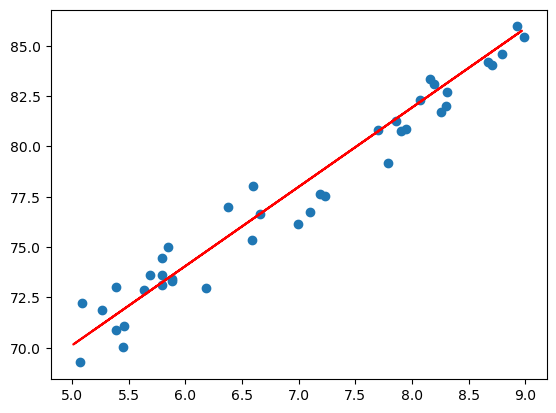

In [46]:
plt.scatter(X_test,y_test)
plt.plot(X_train,lr.predict(X_train),color='red')

# Save ML Model

In [47]:
import joblib
joblib.dump(lr,"Student_mark_predictor_model.pkl")

['Student_mark_predictor_model.pkl']

# Check Model:-

In [49]:
model = joblib.load("Student_mark_predictor_model.pkl")
model.predict([[5]])[0][0]

C:\Users\hp\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


70.12594512018406